# 0. 라이브러리 준비

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화

# 1. 데이터 호출 및 정제 

## 1.1. 데이터 확인

In [33]:
metro_df = pd.read_csv('./dataset/서울시 지하철 승하차 인원 정보.csv',encoding = 'cp949')

In [34]:
metro_df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,4968,21,444,1,1,0,0,0,0,20210903
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,822,3,72,0,2,0,0,0,0,20210903
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,3747,15,390,0,0,0,0,0,0,20210903


In [35]:
# 데이터 프레임 정보 요약
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  int64 
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

In [36]:
# 데이터 확인하기
# 사용월
month = sorted(list(set(metro_df['사용월'])))
print(month)

[201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108]


## 1.2. 데이터 정제
### 2020년 이전의 데이터만 추출 - 총 20개의 월

In [37]:
# 2020년 이전의 데이터만 수집하여 코로나 이후 지하철 유동 인구를 분석
# 전체 46552개의 데이터 중 12049개 추출
metro_corona = metro_df[(metro_df['사용월']>201804) & (metro_df['사용월']< 202000)]
metro_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11896 entries, 12049 to 23944
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           11896 non-null  int64 
 1   호선명           11896 non-null  object
 2   지하철역          11896 non-null  object
 3   04시-05시 승차인원  11896 non-null  int64 
 4   04시-05시 하차인원  11896 non-null  int64 
 5   05시-06시 승차인원  11896 non-null  int64 
 6   05시-06시 하차인원  11896 non-null  int64 
 7   06시-07시 승차인원  11896 non-null  int64 
 8   06시-07시 하차인원  11896 non-null  int64 
 9   07시-08시 승차인원  11896 non-null  int64 
 10  07시-08시 하차인원  11896 non-null  int64 
 11  08시-09시 승차인원  11896 non-null  int64 
 12  08시-09시 하차인원  11896 non-null  int64 
 13  09시-10시 승차인원  11896 non-null  int64 
 14  09시-10시 하차인원  11896 non-null  int64 
 15  10시-11시 승차인원  11896 non-null  int64 
 16  10시-11시 하차인원  11896 non-null  int64 
 17  11시-12시 승차인원  11896 non-null  int64 
 18  11시-12시 하차인원  11896 non-null  int64 
 19  

In [38]:
metro_corona

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
12049,201912,1호선,동대문,736,11,15458,2168,11211,7176,16660,...,14309,1270,5288,116,277,1,13,0,0,20200103
12050,201912,1호선,동묘앞,118,2,3349,764,3458,4717,6553,...,5228,272,3562,4,359,1,57,0,0,20200103
12051,201912,1호선,서울역,1042,21,10804,8783,13452,49937,40767,...,22452,4110,8914,49,1604,0,66,0,0,20200103
12052,201912,1호선,시청,46,0,2172,4142,3803,21249,8116,...,5784,2863,1655,361,163,2,17,0,0,20200103
12053,201912,1호선,신설동,268,15,9605,2289,10069,8260,19763,...,12885,701,3574,18,222,1,32,0,0,20200103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23940,201805,중앙선,원덕,32,0,449,9,751,199,1153,...,414,7,254,0,1,0,0,0,0,20180603
23941,201805,중앙선,중랑,71,1,6483,595,10927,2792,25784,...,6860,123,1549,0,0,0,0,0,0,20180603
23942,201805,중앙선,지평,0,0,0,0,0,0,282,...,0,0,0,0,0,0,0,0,0,20180603
23943,201805,중앙선,팔당,9,0,334,141,884,618,2050,...,368,21,110,0,0,0,0,0,0,20180603


### 동작구 흑석역 주변 지하철역 데이터만 추출

In [39]:
# 모든 지하철명 출력
name = list(set(metro_df['지하철역']))
print(name)

['건대입구', '하계', '양천향교', '청량리(지하)', '영종', '서빙고', '역삼', '등촌', '상봉', '인덕원', '별내', '봉천', '신대방삼거리', '뚝섬유원지', '구로디지털단지', '진위', '사릉', '용마산', '충정로(경기대입구)', '창동', '신흥', '서동탄', '개롱', '가천대', '올림픽공원(한국체대)', '부천', '선릉', '부천종합운동장', '보산', '산본', '쌍용동', '동작', '역곡', '망우', '신목동', '오리', '염창', '구로', '삼성중앙', '백마', '효창공원앞', '미아사거리', '성신여대입구', '증산', '아산', '독바위', '도심', '잠실새내', '언주', '종합운동장', '봉은사', '무악재', '죽전', '회현(남대문시장)', '월곡(동덕여대)', '중앙보훈병원', '덕소', '회룡', '장암', '상천', '군자(능동)', '을지로입구', '남한산성입구', '마두', '구룡', '세류', '남태령', '광명사거리', '송내', '상월곡', '청평', '오류동', '상왕십리', '흑석(중앙대입구)', '군자', '총신대입구(이수)', '이대', '약수', '방학', '신사', '홍제', '상계', '아현', '인천', '연신내', '버티고개', '원흥', '선유도', '개포동', '남구로', '당산', '강남구청', '창신', '낙성대', '화전', '갈매', '충정로', '녹번', '복정', '공항시장', '천안', '아신', '원덕', '대방', '야탑', '공릉', '충무로', '상갈', '애오개', '동두천 중앙', '광나루(장신대)', '태릉입구', '광나루', '능곡', '삼전', '명학', '불광', '서현', '봉명', '삼송', '남한산성입구(성남법원.검찰청)', '춘천', '초지', '선정릉', '광화문(세종문화회관)', '수내', '용산', '동두천', '원당', '세마', '금촌', '공덕', '굴봉산', '먹골', '양주', '신갈', '행당', '회기'

In [40]:
dj = ['흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' ]

In [41]:
metro_dj = metro_corona[metro_corona['지하철역'].isin(dj)].reset_index(drop=True)

In [42]:
metro_dj['지하철역'].value_counts()

노량진           40
동작(현충원)       40
총신대입구(이수)     20
장승배기          20
신대방삼거리        20
노들            20
흑석(중앙대입구)     20
숭실대입구(살피재)    20
상도            20
Name: 지하철역, dtype: int64

### 불필요한 데이터 삭제 : 작업일자

In [43]:
metro_dj = metro_dj.drop(columns=['작업일자'])

In [44]:
metro_dj.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,201912,4호선,동작(현충원),34,0,349,158,1307,2113,5102,...,689,2193,172,1156,6,200,0,11,0,0
1,201912,4호선,총신대입구(이수),151,9,6772,1131,17034,11640,47930,...,14399,21414,2248,6256,33,564,0,0,0,0
2,201912,7호선,상도,0,0,4599,3357,11091,8673,32208,...,6903,14379,1395,4769,13,100,0,0,0,0


### 호선 합치기

In [45]:
metro_line = metro_dj.groupby(['지하철역','사용월']).sum().reset_index()
metro_line

,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,노들,201805,36,1,3600,270,6255,1618,19051,2691,...,1129,5388,224,1704,0,2,0,0,1,0
1,노들,201806,32,0,3456,258,6148,1588,18379,2613,...,1231,5089,182,1478,0,4,0,0,0,0
2,노들,201807,30,0,3571,280,6666,1625,19767,2939,...,1130,5002,200,1591,0,0,0,0,0,0
3,노들,201808,26,0,3272,297,6134,1550,18842,2805,...,1063,4693,200,1687,0,10,0,0,0,0
4,노들,201809,13,0,3271,268,5471,1573,16875,2521,...,1003,4662,172,1275,2,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,흑석(중앙대입구),201908,1,0,3538,905,6141,4695,17892,11164,...,4626,10908,881,3255,0,70,0,0,0,0
176,흑석(중앙대입구),201909,6,1,3361,975,5936,4651,17856,10931,...,6740,10297,1462,3133,2,91,0,0,0,0
177,흑석(중앙대입구),201910,11,1,3731,1109,6392,5315,19263,12400,...,7965,11505,1703,3441,0,50,0,0,0,0
178,흑석(중앙대입구),201911,9,1,3703,965,6152,4973,17741,12314,...,7381,11617,1669,3620,1,69,0,0,0,0


### 승,하차 인원 합치기 (승차 + 하차 = 유동인구)


In [46]:
columns = metro_line.columns.tolist()
columns = columns[2:]
print(columns)

['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원']


In [47]:
times = []
for i in columns:
    i = i.strip('승차인원')
    i = i.strip('하차인원')
    times.append(i)


# 중복 제거
time = []
for v in times :
    if v not in time :
        time.append(v)
print(time)

['04시-05시 ', '05시-06시 ', '06시-07시 ', '07시-08시 ', '08시-09시 ', '09시-10시 ', '10시-11시 ', '11시-12시 ', '12시-13시 ', '13시-14시 ', '14시-15시 ', '15시-16시 ', '16시-17시 ', '17시-18시 ', '18시-19시 ', '19시-20시 ', '20시-21시 ', '21시-22시 ', '22시-23시 ', '23시-24시 ', '00시-01시 ', '01시-02시 ', '02시-03시 ', '03시-04시 ']


In [48]:
metro_total = pd.DataFrame()
metro_total['지하철역'] = metro_line['지하철역']
metro_total['사용월'] = metro_line['사용월']

for i in range(len(time)) :
    metro_total[time[i]] = metro_line[columns[2*i]] + metro_line[columns[2*i+1]]

metro_total

,지하철역,사용월,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,노들,201805,37,3870,7873,21742,26624,18137,13593,11766,...,22284,18339,12489,11775,12476,6517,1928,2,0,1
1,노들,201806,32,3714,7736,20992,24873,17440,12940,11099,...,21801,17200,11944,11170,11649,6320,1660,4,0,0
2,노들,201807,30,3851,8291,22706,27966,18201,13358,11617,...,24046,18862,12930,11635,12082,6132,1791,0,0,0
3,노들,201808,26,3569,7684,21647,26108,17272,13162,11071,...,23534,18510,12491,11321,11374,5756,1887,10,0,0
4,노들,201809,13,3539,7044,19396,23373,16564,13067,11140,...,20775,16203,10811,10219,10581,5665,1447,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,흑석(중앙대입구),201908,1,4443,10836,29056,41370,31879,25503,25699,...,47536,36110,25823,22929,23309,15534,4136,70,0,0
176,흑석(중앙대입구),201909,7,4336,10587,28787,51220,35954,34092,28981,...,55837,39675,28667,27584,25717,17037,4595,93,0,0
177,흑석(중앙대입구),201910,12,4840,11707,31663,53762,41194,36547,31935,...,59866,42021,31107,29774,28282,19470,5144,50,0,0
178,흑석(중앙대입구),201911,10,4668,11125,30055,58338,42395,36949,32765,...,62143,42440,30603,28971,27732,18998,5289,70,0,0


### 가게 영업 시간대(13시 ~ 18시)의 데이터만 추출

In [49]:
metro_YS = metro_total[['지하철역','사용월',
 '13시-14시 ',
 '14시-15시 ',
 '15시-16시 ',
 '16시-17시 ',
 '17시-18시 ',
 '18시-19시 ',
 '19시-20시 ']]

In [50]:
# 정제 완료된 데이터 : metro_YS
# 2020년 1월 ~ 2021년 8월까지의 동작구 지하철역(9개) 유동인구 데이터
# '흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' 
metro_YS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지하철역      180 non-null    object
 1   사용월       180 non-null    int64 
 2   13시-14시   180 non-null    int64 
 3   14시-15시   180 non-null    int64 
 4   15시-16시   180 non-null    int64 
 5   16시-17시   180 non-null    int64 
 6   17시-18시   180 non-null    int64 
 7   18시-19시   180 non-null    int64 
 8   19시-20시   180 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.8+ KB


# 2. 데이터 분석

In [51]:
metro_YS.head(20)

,지하철역,사용월,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,201805,13907,13039,13460,14241,17489,22284,18339
1,노들,201806,13317,12248,13140,13780,17119,21801,17200
2,노들,201807,13704,12126,12993,13732,17245,24046,18862
3,노들,201808,13012,11487,12851,13501,16940,23534,18510
4,노들,201809,13004,11913,12762,13770,16757,20775,16203
5,노들,201810,13669,12562,13537,15926,18326,25322,19888
6,노들,201811,13505,11935,13110,14944,17487,23449,17791
7,노들,201812,13942,12810,13315,15400,17815,21467,16229
8,노들,201901,13644,12606,12879,14066,16758,22638,17645
9,노들,201902,12112,11012,11216,12850,14561,18667,14669


## 2.1. 시간대별 평균 유동인구

In [52]:
metro_mean = metro_YS.groupby(['지하철역']).mean().reset_index() # 지하철역 마다 평균 계산
metro_mean = metro_mean.drop(columns='사용월') # 사용월 칼럼 삭제

df_metro_mean = pd.DataFrame(metro_mean)
df_metro_mean

,지하철역,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,13783.00,12494.10,13334.60,14831.40,17438.10,22762.20,17715.30
1,노량진,133045.35,116314.25,120726.10,136921.00,175471.10,246132.85,167780.00
2,동작(현충원),16741.65,16093.05,17556.45,17598.15,19426.00,23585.25,15453.70
3,상도,33319.40,33089.30,34234.10,40678.70,47382.20,62364.75,45198.40
4,숭실대입구(살피재),46774.15,45010.25,45221.60,57297.50,66262.95,80134.80,62843.70
5,신대방삼거리,43595.45,42691.85,45990.65,51564.10,60961.80,93816.75,73724.95
6,장승배기,33050.55,31465.75,33814.85,36914.35,42714.50,58456.65,44296.20
7,총신대입구(이수),72274.50,72619.75,77442.90,86107.20,101408.45,140661.80,101673.50
8,흑석(중앙대입구),33345.40,32453.75,35407.75,40090.15,49674.90,54489.45,39437.35


## 2.2. 각 지하철역 별  시간대 유동인구 그래프 by matplotlib.pyplot

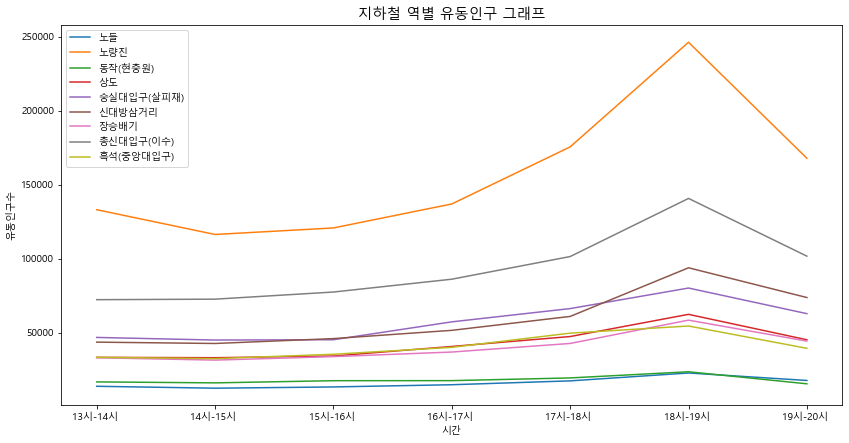

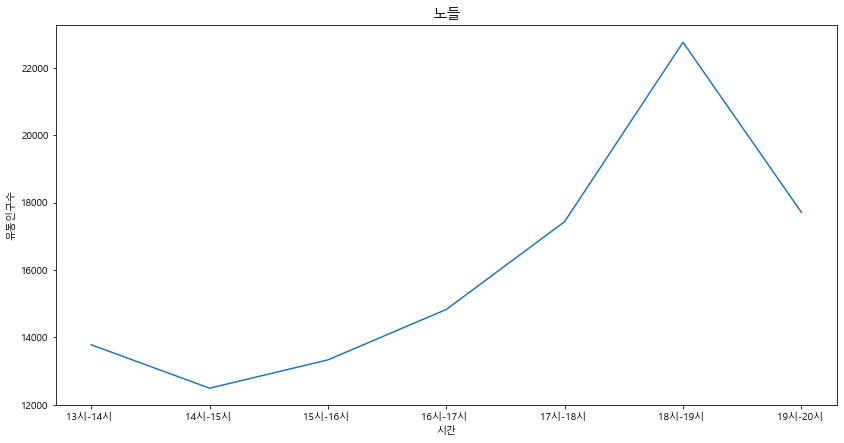

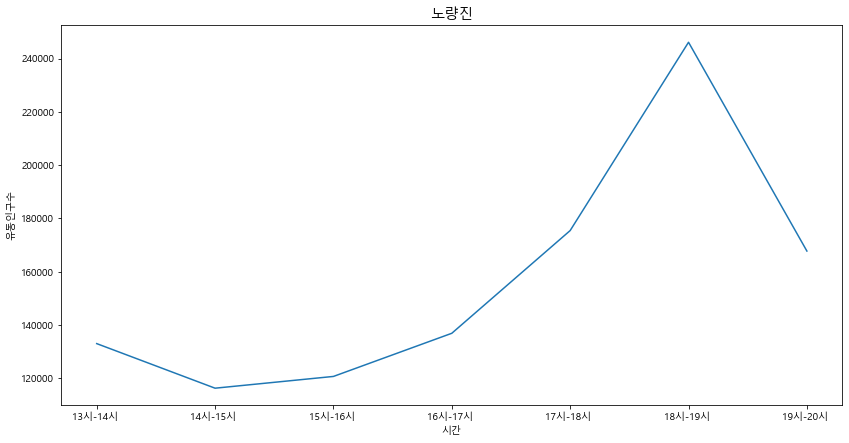

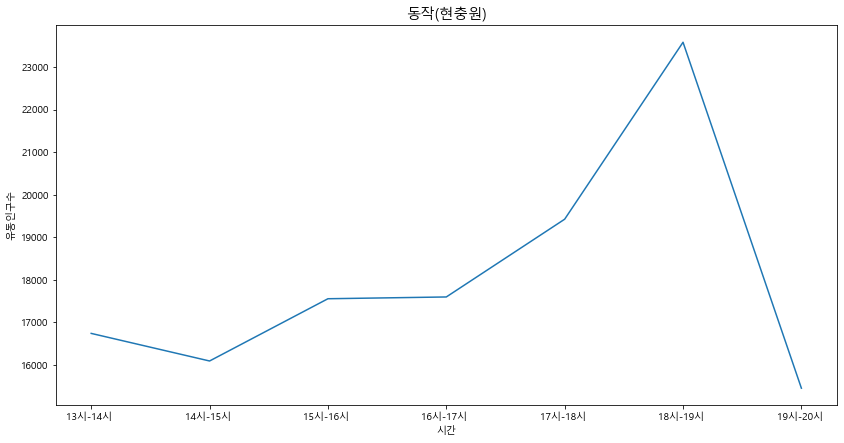

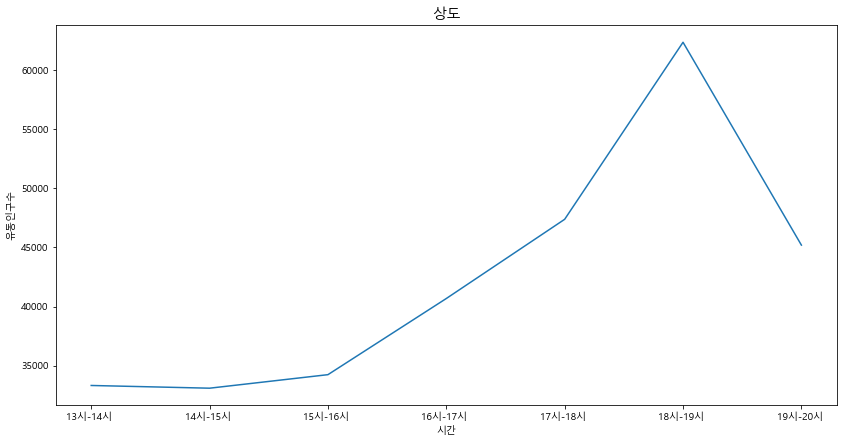

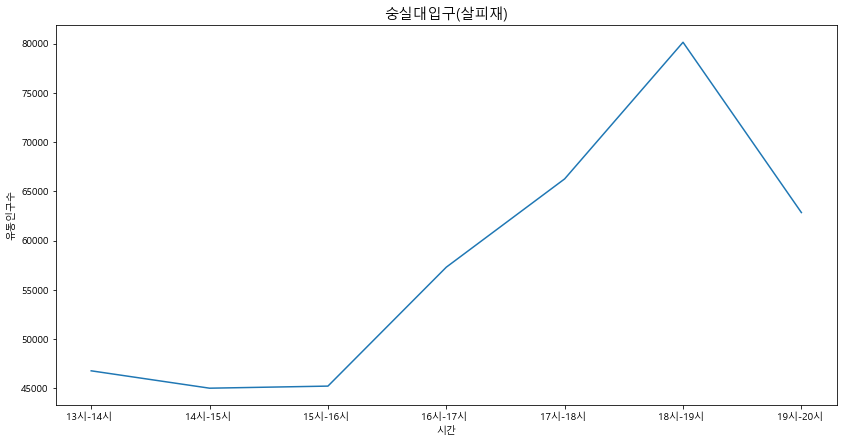

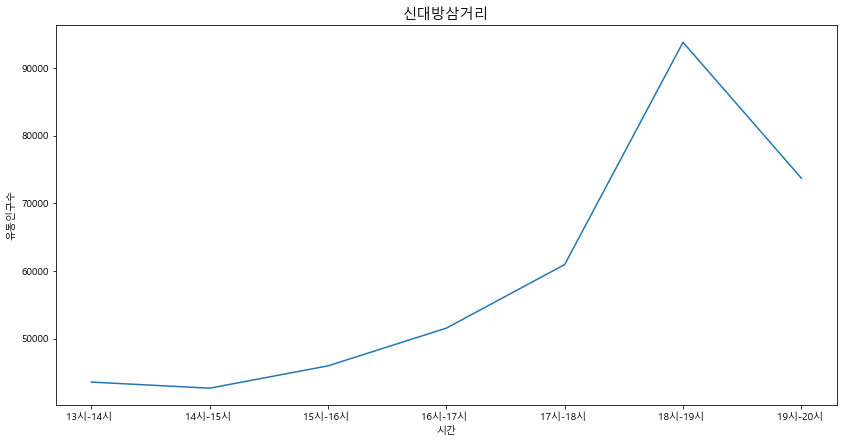

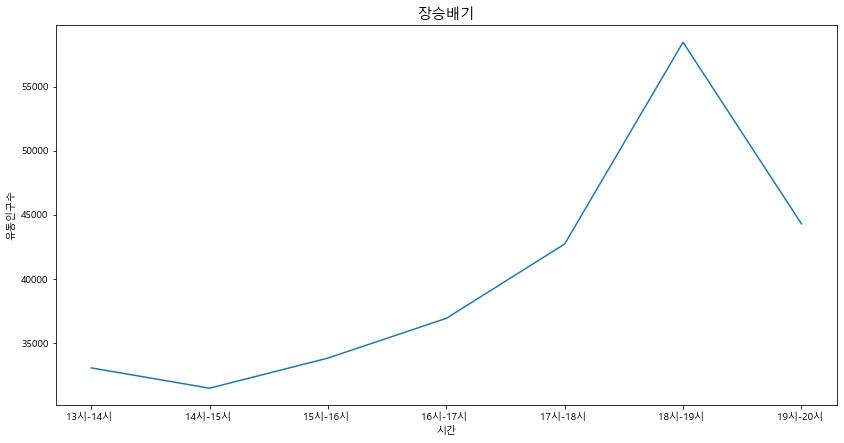

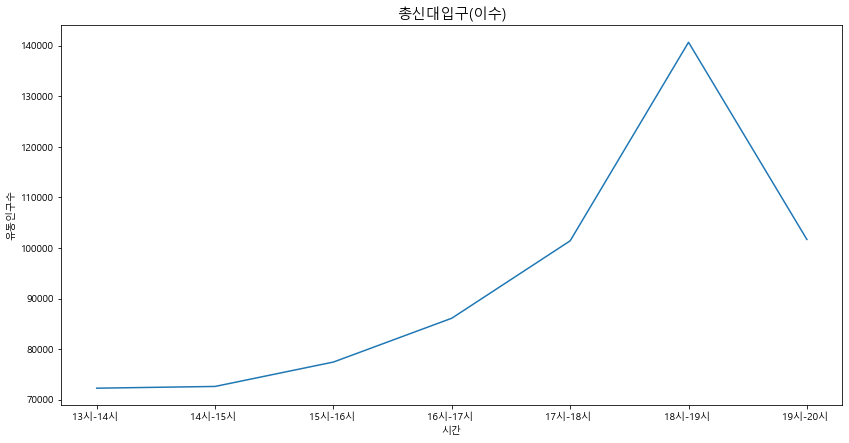

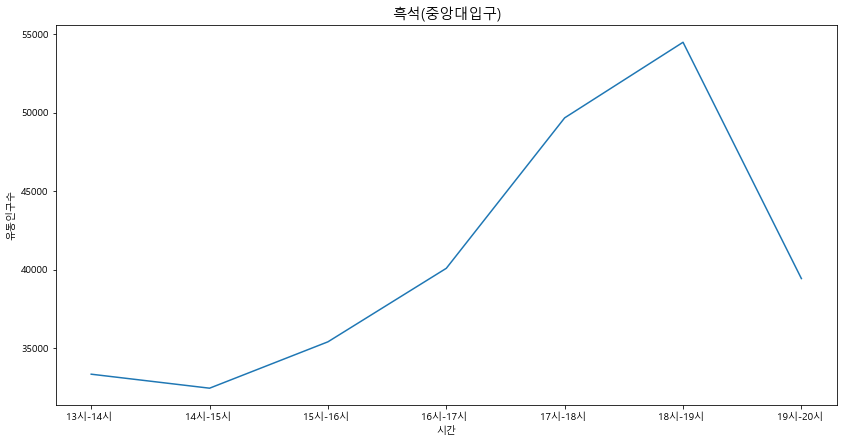

In [53]:
#1) 지하철 역별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(14, 7))
plt.xlabel('시간')
plt.ylabel('유동인구수')
plt.title('지하철 역별 유동인구 그래프', fontsize='x-large')

for i in range(len(df_metro_mean.index)):
    df_plot_merged = df_metro_mean.iloc[i, 1:]
    plt.plot(df_plot_merged, label = df_metro_mean['지하철역'][i])
    plt.legend(fontsize='medium')
    
#2) 지하철 역별 그래프_separated
for j in range(len(df_metro_mean.index)):
    df_plot_separated = df_metro_mean.iloc[j, 1:]
    plt.figure(figsize=(14, 7))
    plt.plot(df_plot_separated)
    plt.title(df_metro_mean['지하철역'][j], fontsize='x-large')
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    plt.show()